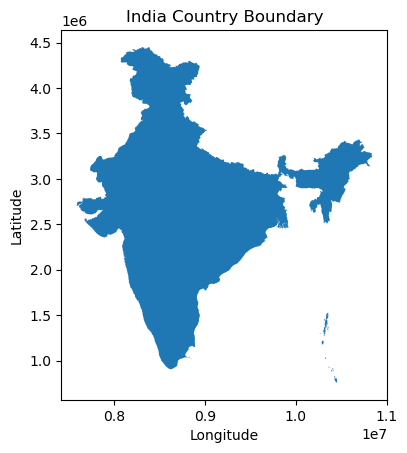

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to the shapefile
shapefile_path = r'C:\Users\Subhadeep Maishal\Music\JUP\Breathe\India-State\shp\India_Country_Boundary.shp'

# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Plot the shapefile
gdf.plot()

# Add title and show the plot
plt.title('India Country Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


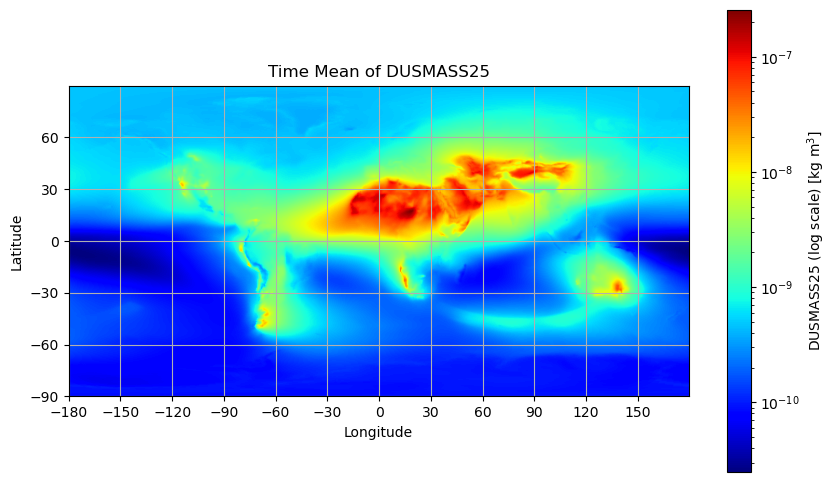

In [2]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Path to the NetCDF file
file_path = 'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pollutants_BC_OC_DUST.nc'

# Open the NetCDF file
nc_file = nc.Dataset(file_path, 'r')

# Read the variable "DUSMASS25"
dust_mass = nc_file.variables['DUSMASS25'][:]

# Read latitude and longitude
latitude = nc_file.variables['lat'][:]
longitude = nc_file.variables['lon'][:]

# Calculate the time mean
dust_mass_mean = np.mean(dust_mass, axis=0)

# Close the NetCDF file
nc_file.close()

# Plotting
plt.figure(figsize=(10, 6))
im = plt.imshow(dust_mass_mean, cmap='jet', norm=LogNorm(), origin='lower', extent=[longitude.min(), longitude.max(), latitude.min(), latitude.max()])
cbar = plt.colorbar(im, label='DUSMASS25 (log scale) [kg m$^{3}$]')  # Add color bar label with unit
plt.title('Time Mean of DUSMASS25')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Custom ticks for latitude and longitude
plt.xticks(np.arange(longitude.min(), longitude.max(), 30))
plt.yticks(np.arange(latitude.min(), latitude.max(), 30))

plt.grid(True)
plt.show()


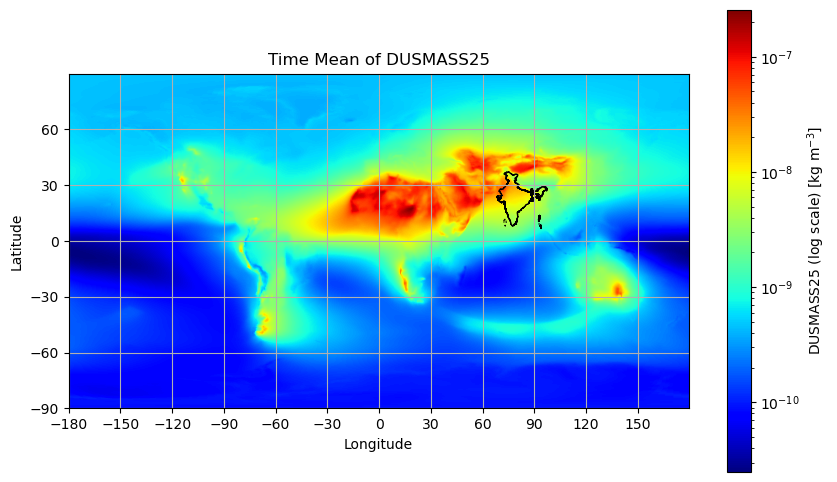

In [4]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import LogNorm
from rasterio.crs import CRS

# Path to the NetCDF file
file_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pollutants_BC_OC_DUST.nc'

# Open the NetCDF file
nc_file = nc.Dataset(file_path, 'r')

# Read the variable "DUSMASS25"
dust_mass = nc_file.variables['DUSMASS25'][:]

# Calculate the time mean
dust_mass_mean = np.mean(dust_mass, axis=0)

# Read latitude and longitude
latitude = nc_file.variables['lat'][:]
longitude = nc_file.variables['lon'][:]

# Close the NetCDF file
nc_file.close()

# Create a GeoDataFrame from the shapefile
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_Country_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)

# Reproject the shapefile to match the CRS of the NetCDF data
crs = CRS.from_epsg(4326)  # Assuming the NetCDF data is in WGS 84
india_shape = india_shape.to_crs(crs)

# Plotting
plt.figure(figsize=(10, 6))
im = plt.imshow(dust_mass_mean, cmap='jet', norm=LogNorm(), origin='lower', extent=[longitude.min(), longitude.max(), latitude.min(), latitude.max()])
cbar = plt.colorbar(im, label='DUSMASS25 (log scale) [kg m$^{-3}$]')  # Add color bar label with unit
plt.title('Time Mean of DUSMASS25')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Custom ticks for latitude and longitude
plt.xticks(np.arange(longitude.min(), longitude.max(), 30))
plt.yticks(np.arange(latitude.min(), latitude.max(), 30))

# Overlay reprojected shapefile
india_shape.plot(ax=plt.gca(), color='none', edgecolor='black')

plt.grid(True)
plt.show()


In [33]:
!pip install rioxarray

   ---------------------------------------- 0.0/53.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/53.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/53.7 kB ? eta -:--:--
   ------- -------------------------------- 10.2/53.7 kB ? eta -:--:--
   -------------------------------------- - 51.2/53.7 kB 871.5 kB/s eta 0:00:01
   -------------------------------------- - 51.2/53.7 kB 871.5 kB/s eta 0:00:01
   ---------------------------------------- 53.7/53.7 kB 310.5 kB/s eta 0:00:00


In [2]:
import geopandas as gpd
import xarray as xr
import rioxarray
from shapely.geometry import mapping

# Open the NetCDF file and select the desired variable
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/MERRA2_PM25_total.nc')
CHIRPS_daily = nc_data['PM25_surface_mass_concentration']

# Set spatial dimensions
CHIRPS_daily.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)

# Write CRS
CHIRPS_daily.rio.write_crs("epsg:4326", inplace=True)

# Read the shapefile
Shapefile = gpd.read_file('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_Country_Boundary.shp', crs="epsg:4326")

# Clip the NetCDF data to the shapefile boundary
clipped = CHIRPS_daily.rio.clip(Shapefile.geometry.apply(mapping), Shapefile.crs, drop=False)

# Save clipped data to NetCDF format
clipped.to_netcdf("C:/Users/Subhadeep Maishal/Music/JUP/Breathe/NEW_DATA/pul_india.nc")


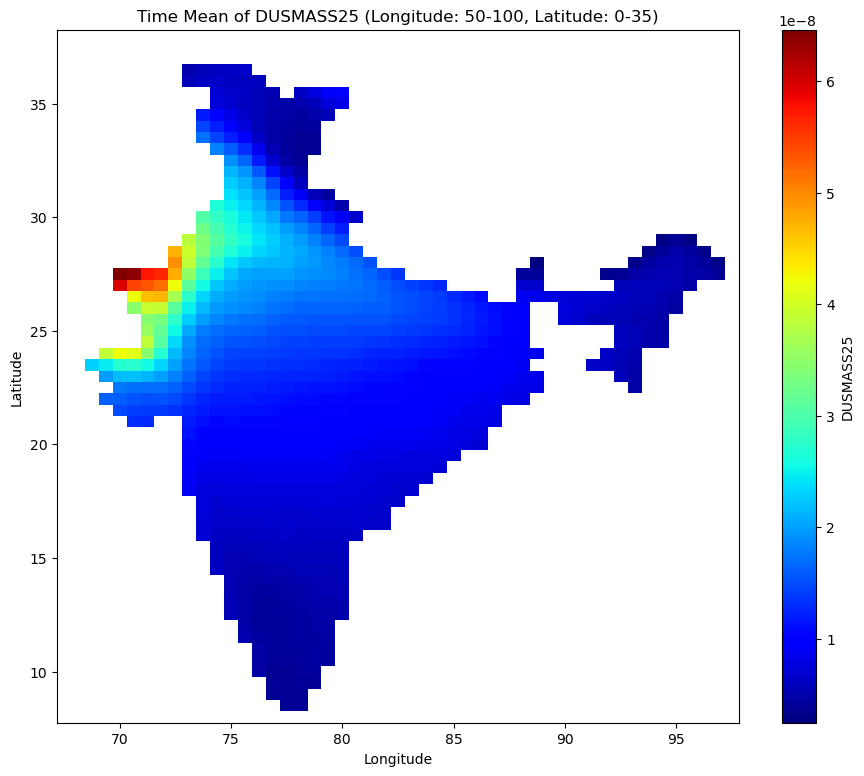

In [56]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt

# Open the NetCDF file containing the time mean data
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')

# Extract the DataArray containing the 'DUSMASS25' variable
dusmass_data = nc_data['DUSMASS25']

# Define latitude and longitude ranges
lat_range = slice(8, 38)  # Latitude range from 0 to 35
lon_range = slice(67, 98)  # Longitude range from 50 to 100

# Subset the data within the specified latitude and longitude range
subset_data = dusmass_data.sel(lat=lat_range, lon=lon_range)

# Calculate the time mean within the subset range
time_mean_subset = subset_data.mean(dim='time')

# Plotting
plt.figure(figsize=(11, 9))

# Plot the time mean data
time_mean_subset.plot(cmap='jet')

# Add title and labels
plt.title('Time Mean of DUSMASS25 (Longitude: 50-100, Latitude: 0-35)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()


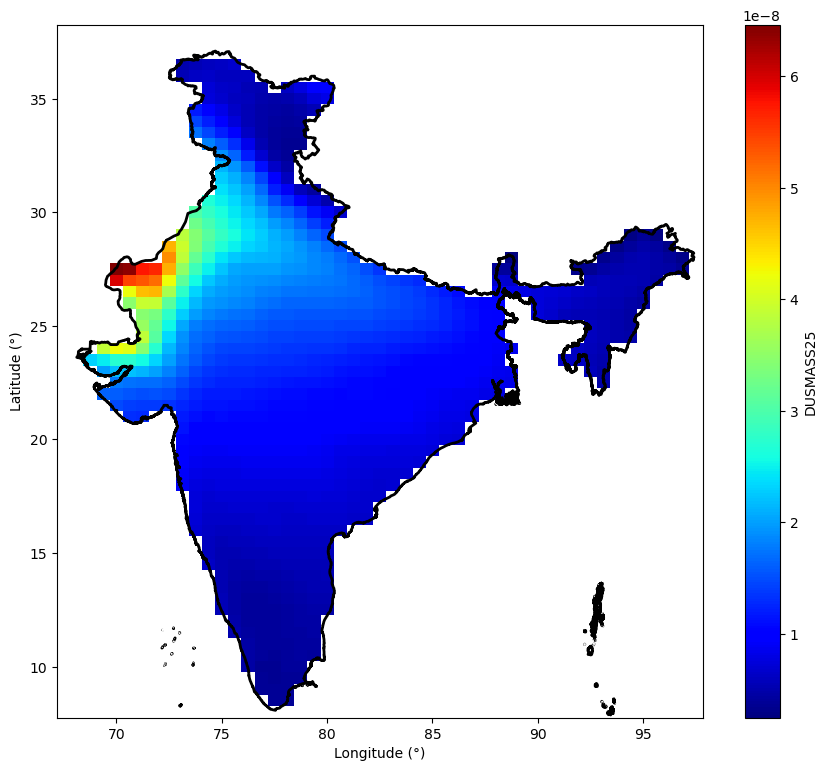

In [70]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
from pyproj import CRS

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
lat_range = slice(8, 38)  # Latitude range from 0 to 35
lon_range = slice(67, 98)  # Longitude range from 50 to 100

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range).mean(dim='time')

# Manually specify the CRS based on your knowledge
# For example, assuming the data is in WGS 84 (EPSG:4326)
nc_crs = CRS.from_epsg(4326)

# Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_Country_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)

# Reproject the shapefile to match the CRS of the NetCDF data
india_shape = india_shape.to_crs(nc_crs)

# Step 3: Plot the time mean data
plt.figure(figsize=(11, 9))
subset_data.plot(cmap='jet')

# Step 4: Overlay the reprojected shapefile
india_shape.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=2)

# Add title and labels
plt.title('')
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')

# Show plot
plt.show()


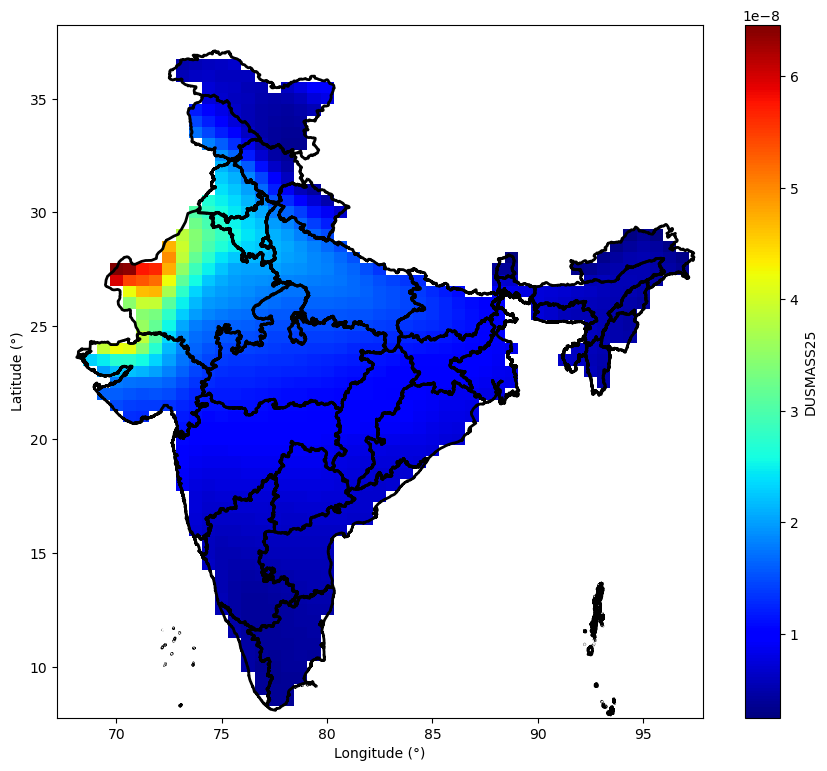

In [71]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
from pyproj import CRS

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
lat_range = slice(8, 38)  # Latitude range from 0 to 35
lon_range = slice(67, 98)  # Longitude range from 50 to 100

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range).mean(dim='time')

# Manually specify the CRS based on your knowledge
# For example, assuming the data is in WGS 84 (EPSG:4326)
nc_crs = CRS.from_epsg(4326)

# Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)

# Reproject the shapefile to match the CRS of the NetCDF data
india_shape = india_shape.to_crs(nc_crs)

# Step 3: Plot the time mean data
plt.figure(figsize=(11, 9))
subset_data.plot(cmap='jet')

# Step 4: Overlay the reprojected shapefile
india_shape.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=1)

# Add title and labels
plt.title('')
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')

# Show plot
plt.show()


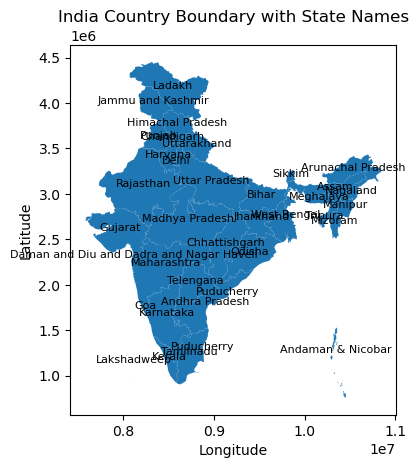

In [74]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to the shapefile
shapefile_path = r'C:\Users\Subhadeep Maishal\Music\JUP\Breathe\India-State\shp\India_State_Boundary.shp'

# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Plot the shapefile
gdf.plot()

# Add state names as labels
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['State_Name']):
    plt.text(x, y, label, fontsize=8, ha='center')

# Add title and show the plot
plt.title('India Country Boundary with State Names')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


C:\Users\Subhadeep Maishal\AppData\Local\Temp\ipykernel_3716\4111377315.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for i, (x, y, label) in enumerate(zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['State_Name']), 1):


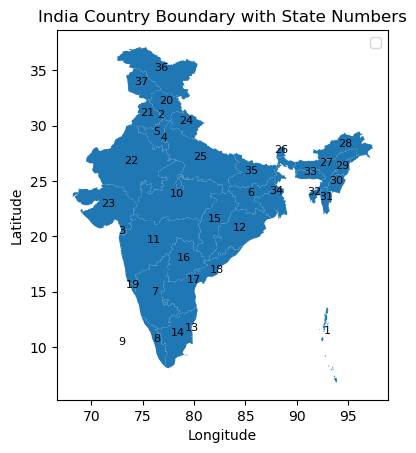

In [78]:
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr
from pyproj import CRS

# Path to the shapefile
shapefile_path = r'C:\Users\Subhadeep Maishal\Music\JUP\Breathe\India-State\shp\India_State_Boundary.shp'

# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Define the CRS of the NetCDF data (assuming it's WGS 84)
nc_crs = CRS.from_epsg(4326)

# Reproject the shapefile to match the CRS of the NetCDF data
gdf = gdf.to_crs(nc_crs)

# Plot the shapefile
ax = gdf.plot()

# Add state numbers as labels
for i, (x, y, label) in enumerate(zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['State_Name']), 1):
    ax.text(x, y, str(i), fontsize=8, ha='center')
    
# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

# Add title and show the plot
plt.title('India Country Boundary with State Numbers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


C:\Users\Subhadeep Maishal\AppData\Local\Temp\ipykernel_3716\1470835869.py:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_filtered['centroid'] = gdf_filtered['geometry'].centroid


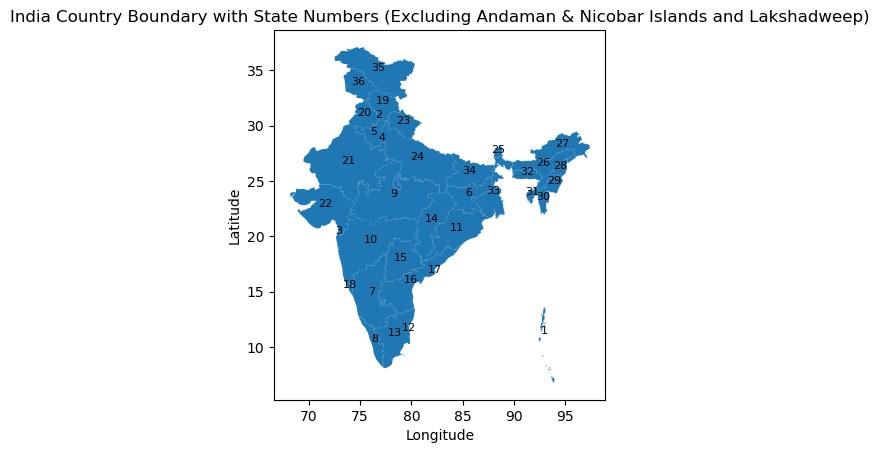

In [81]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pyproj import CRS

# Path to the shapefile
shapefile_path = r'C:\Users\Subhadeep Maishal\Music\JUP\Breathe\India-State\shp\India_State_Boundary.shp'

# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Filter out Andaman and Nicobar Islands and Lakshadweep
gdf_filtered = gdf[~gdf['State_Name'].isin(['Andaman & Nicobar Island', 'Lakshadweep'])]

# Define the CRS of the NetCDF data (assuming it's WGS 84)
nc_crs = CRS.from_epsg(4326)

# Reproject the filtered shapefile to match the CRS of the NetCDF data
gdf_filtered = gdf_filtered.to_crs(nc_crs)

# Plot the shapefile
ax = gdf_filtered.plot()

# Calculate the centroid after reprojection
gdf_filtered['centroid'] = gdf_filtered['geometry'].centroid

# Add state numbers as labels using the centroid coordinates
for i, (point, label) in enumerate(zip(gdf_filtered['centroid'], gdf_filtered['State_Name']), 1):
    ax.text(point.x, point.y, str(i), fontsize=8, ha='center')

# Add title and labels
plt.title('India Country Boundary with State Numbers (Excluding Andaman & Nicobar Islands and Lakshadweep)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()


C:\Users\Subhadeep Maishal\AppData\Local\Temp\ipykernel_3716\2457563392.py:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


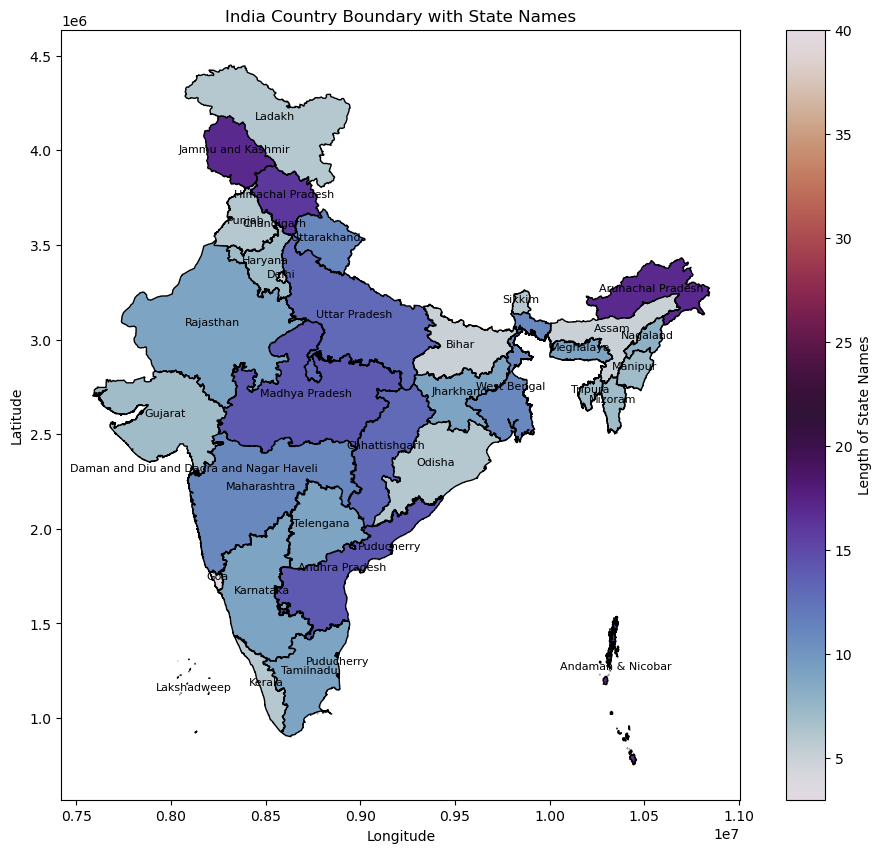

In [100]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Path to the shapefile
shapefile_path = r'C:\Users\Subhadeep Maishal\Music\JUP\Breathe\India-State\shp\India_State_Boundary.shp'

# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Set the figure size
plt.figure(figsize=(12, 10))

# Create an axis object
ax = plt.gca()

# Define a color map
cmap = plt.get_cmap('twilight')

# Normalize the length of state names to range [0, 1] for color assignment
norm = Normalize(vmin=min(gdf['State_Name'].str.len()), vmax=max(gdf['State_Name'].str.len()))

# Plot each state with a color based on the length of state names
for state, name in zip(gdf.geometry, gdf['State_Name']):
    color = cmap(norm(len(name)))
    gdf[gdf.geometry == state].plot(ax=ax, color=color, edgecolor='black')

# Add state names as labels
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['State_Name']):
    ax.text(x, y, label, fontsize=8, ha='center')

# Create a scalar mappable for color bar
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

# Add color bar
cbar = plt.colorbar(sm)
cbar.set_label('Length of State Names')

# Add title and labels
plt.title('India Country Boundary with State Names')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


C:\Users\Subhadeep Maishal\AppData\Local\Temp\ipykernel_3716\2065123020.py:41: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


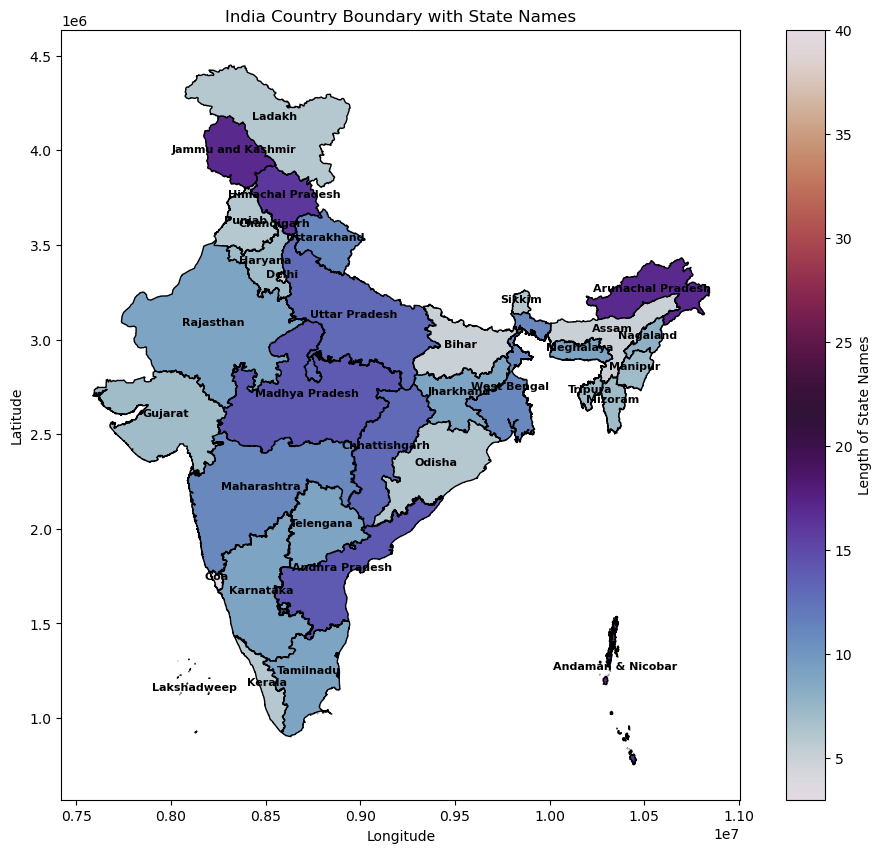

In [103]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Path to the shapefile
shapefile_path = r'C:\Users\Subhadeep Maishal\Music\JUP\Breathe\India-State\shp\India_State_Boundary.shp'

# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Set the figure size
plt.figure(figsize=(12, 10))

# Create an axis object
ax = plt.gca()

# Define a color map
cmap = plt.get_cmap('twilight')

# Normalize the length of state names to range [0, 1] for color assignment
norm = Normalize(vmin=min(gdf['State_Name'].str.len()), vmax=max(gdf['State_Name'].str.len()))

# Plot each state with a color based on the length of state names
for state, name in zip(gdf.geometry, gdf['State_Name']):
    if name not in ['Daman and Diu', 'Dadra and Nagar Haveli']:
        color = cmap(norm(len(name)))
        gdf[gdf.geometry == state].plot(ax=ax, color=color, edgecolor='black')

# Add state names as labels with bold text
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['State_Name']):
    if label not in ['Daman and Diu and Dadra and Nagar Haveli', 'Puducherry']:
        ax.text(x, y, label, fontsize=8, ha='center', weight='bold')

# Create a scalar mappable for color bar
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

# Add color bar
cbar = plt.colorbar(sm)
cbar.set_label('Length of State Names')

# Add title and labels
plt.title('India Country Boundary with State Names')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


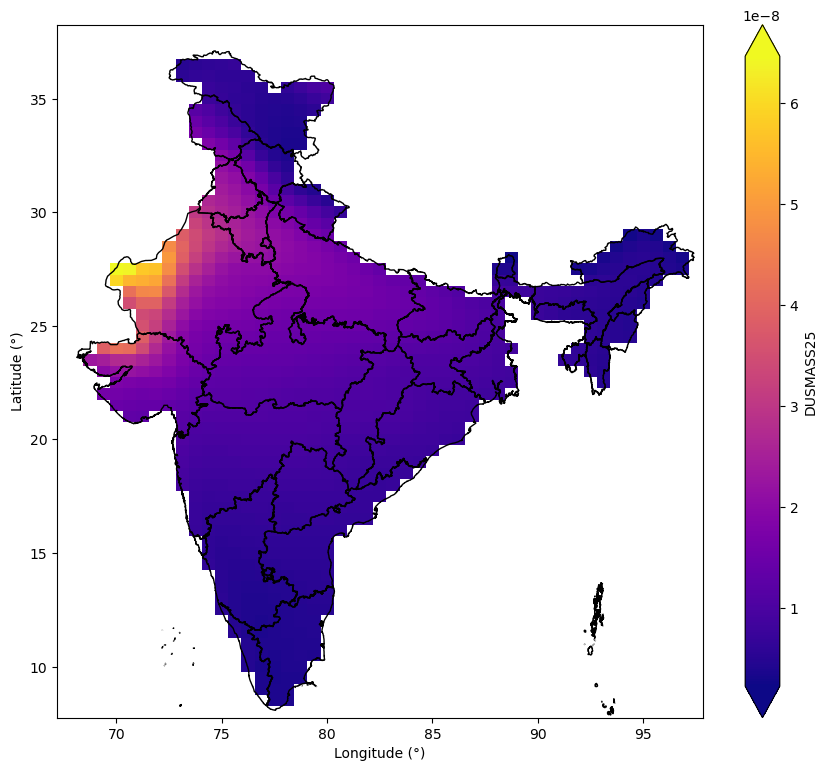

In [106]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
from pyproj import CRS

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
lat_range = slice(8, 38)  # Latitude range from 0 to 35
lon_range = slice(67, 98)  # Longitude range from 50 to 100

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range).mean(dim='time')

# Manually specify the CRS based on your knowledge
# For example, assuming the data is in WGS 84 (EPSG:4326)
nc_crs = CRS.from_epsg(4326)

# Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)

# Reproject the shapefile to match the CRS of the NetCDF data
india_shape = india_shape.to_crs(nc_crs)

# Step 3: Plot the time mean data
plt.figure(figsize=(11, 9))
plot = time_mean_subset.plot(cmap='plasma', vmin=time_mean_subset.max(), vmax=time_mean_subset.min())

# Step 4: Overlay the reprojected shapefile
india_shape.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=1)

# Add title and labels
plt.title('')
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')

# Show plot
plt.show()


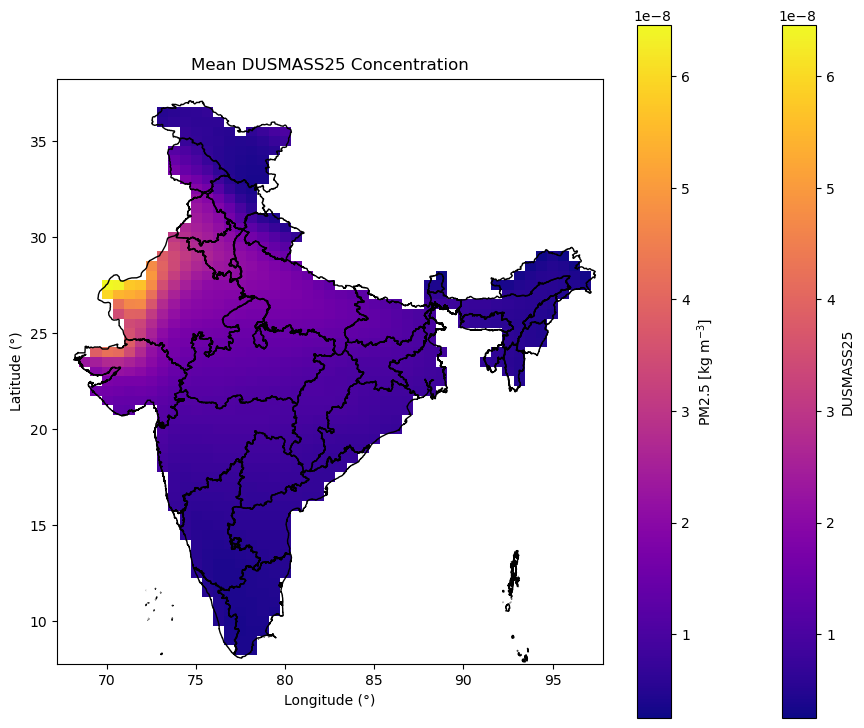

In [1]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
lat_range = slice(8, 38)  # Latitude range from 8 to 38
lon_range = slice(67, 98)  # Longitude range from 67 to 98

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range)

# Calculate the time mean
time_mean_subset = subset_data.mean(dim='time')

# Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)

# Manually specify the CRS based on your knowledge
# For example, assuming the data is in WGS 84 (EPSG:4326)
nc_crs = 'EPSG:4326'

# Reproject the shapefile to match the CRS of the NetCDF data
india_shape = india_shape.to_crs(nc_crs)

# Step 3: Plot the subset data
plt.figure(figsize=(11, 9))
plot = time_mean_subset.plot(cmap='plasma', vmin=time_mean_subset.min(), vmax=time_mean_subset.max())

# Overlay the reprojected shapefile
india_shape.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=1)

# Add colorbar
cbar = plt.colorbar(plot, label='PM2.5 [kg m$^{-3}$]')

# Add title and labels
plt.title('Mean DUSMASS25 Concentration')
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')

# Show plot
plt.show()


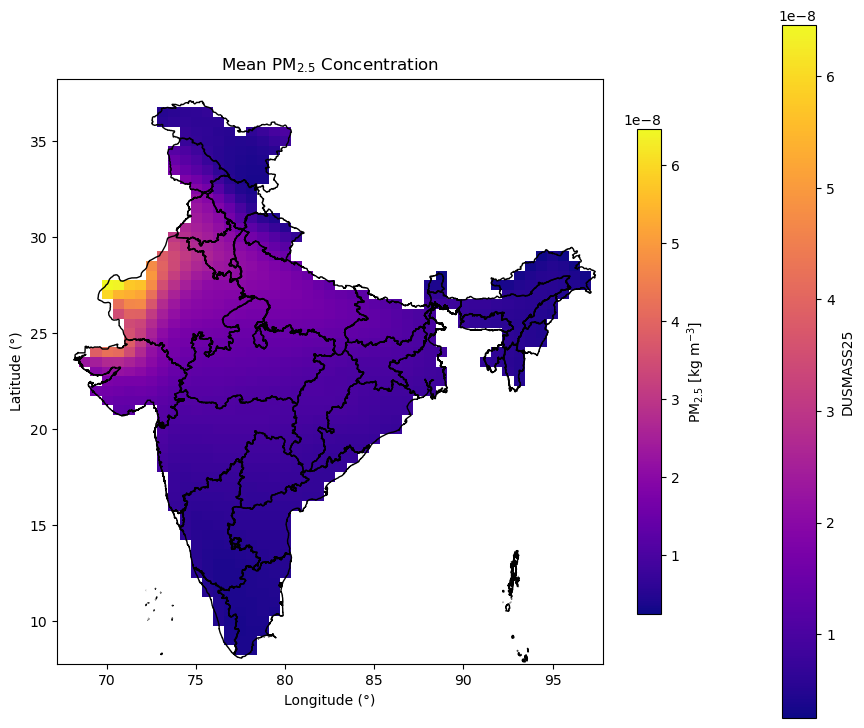

In [3]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
lat_range = slice(8, 38)  # Latitude range from 8 to 38
lon_range = slice(67, 98)  # Longitude range from 67 to 98

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range)

# Calculate the time mean
time_mean_subset = subset_data.mean(dim='time')

# Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)

# Manually specify the CRS based on your knowledge
# For example, assuming the data is in WGS 84 (EPSG:4326)
nc_crs = 'EPSG:4326'

# Reproject the shapefile to match the CRS of the NetCDF data
india_shape = india_shape.to_crs(nc_crs)

# Step 3: Plot the subset data
plt.figure(figsize=(11, 9))
plot = time_mean_subset.plot(cmap='plasma', vmin=time_mean_subset.min(), vmax=time_mean_subset.max())

# Overlay the reprojected shapefile
india_shape.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=1)

# Add colorbar with smaller size
cbar = plt.colorbar(plot, label='PM$_{2.5}$ [kg m$^{-3}$]', shrink=0.7)

# Add title and labels
plt.title('Mean PM$_{2.5}$ Concentration')
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')

# Show plot
plt.show()


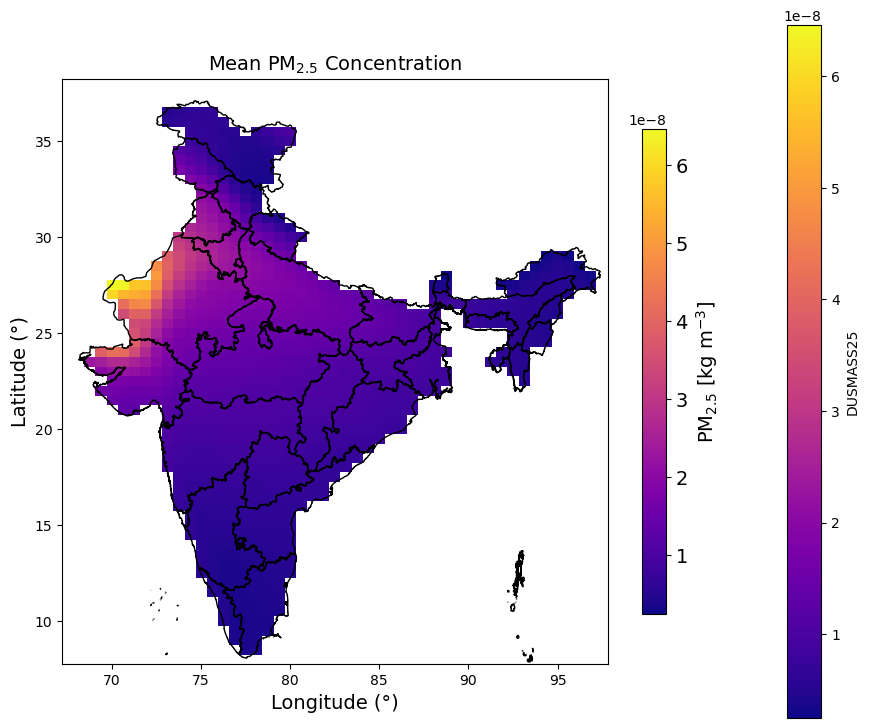

In [6]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
lat_range = slice(8, 38)  # Latitude range from 8 to 38
lon_range = slice(67, 98)  # Longitude range from 67 to 98

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range)

# Calculate the time mean
time_mean_subset = subset_data.mean(dim='time')

# Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)

# Manually specify the CRS based on your knowledge
# For example, assuming the data is in WGS 84 (EPSG:4326)
nc_crs = 'EPSG:4326'

# Reproject the shapefile to match the CRS of the NetCDF data
india_shape = india_shape.to_crs(nc_crs)

# Step 3: Plot the subset data
plt.figure(figsize=(11, 9))
plot = time_mean_subset.plot(cmap='plasma', vmin=time_mean_subset.min(), vmax=time_mean_subset.max())

# Overlay the reprojected shapefile
india_shape.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=1)

# Add colorbar with smaller size and set the label
cbar = plt.colorbar(plot, shrink=0.7)
cbar.set_label('PM$_{2.5}$ [kg m$^{-3}$]', fontsize=14)  # Set label text size

# Set color bar label text size
cbar.ax.tick_params(labelsize=14)  # Set label text size

# Add title and labels
plt.title('Mean PM$_{2.5}$ Concentration', fontsize=14)  # Increase title font size
plt.xlabel('Longitude (°)', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Latitude (°)', fontsize=14)  # Increase y-axis label font size

# Show plot
plt.show()
